### Chargement des packages

In [9]:
# Chargement et étude rapide du jeu de données Pima
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,roc_auc_score, recall_score, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, KFold
from numpy import mean
from numpy import std
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [10]:
DATA_DIR = './Data'

### Loading Data

In [11]:
import pandas as pd
data = pd.read_table(DATA_DIR+"/heart.dat", sep="\s+",header= None)

In [12]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


In [13]:
# Renommer les colonnes 
data.columns = ['Age', 'sex', 'CPT', 'RBP','SC','FBS','RER', 'MHRA', 'EIA' ,'OP','SPST', 'NMV', 'THAL','label']
data.isnull().sum()

Age      0
sex      0
CPT      0
RBP      0
SC       0
FBS      0
RER      0
MHRA     0
EIA      0
OP       0
SPST     0
NMV      0
THAL     0
label    0
dtype: int64

In [14]:
data

,Age,sex,CPT,RBP,SC,FBS,RER,MHRA,EIA,OP,SPST,NMV,THAL,label
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,1
266,44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,1
267,56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,1
268,57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,1


## Transformer les données en integer, car il y' a des des données catégorales dans le jeu de données

In [15]:
data['sex'] = data["sex"].astype(int)

In [16]:
data['Age'] = data["Age"].astype(int)

In [17]:
data['FBS'] = data["FBS"].astype(int)

In [18]:
data['EIA'] = data["EIA"].astype(int)

In [19]:
data['CPT'] = data["CPT"].astype(int)

In [20]:
data['RER'] = data["RER"].astype(int)

In [21]:
data['THAL'] = data["THAL"].astype(int)

In [22]:
data['NMV'] = data["NMV"].astype(int)

In [23]:
data['SPST'] = data["SPST"].astype(int)

In [24]:
data

,Age,sex,CPT,RBP,SC,FBS,RER,MHRA,EIA,OP,SPST,NMV,THAL,label
0,70,1,4,130.0,322.0,0,2,109.0,0,2.4,2,3,3,2
1,67,0,3,115.0,564.0,0,2,160.0,0,1.6,2,0,7,1
2,57,1,2,124.0,261.0,0,0,141.0,0,0.3,1,0,7,2
3,64,1,4,128.0,263.0,0,0,105.0,1,0.2,2,1,7,1
4,74,0,2,120.0,269.0,0,2,121.0,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172.0,199.0,1,0,162.0,0,0.5,1,0,7,1
266,44,1,2,120.0,263.0,0,0,173.0,0,0.0,1,0,7,1
267,56,0,2,140.0,294.0,0,2,153.0,0,1.3,2,0,3,1
268,57,1,4,140.0,192.0,0,0,148.0,0,0.4,2,0,6,1


## Analyse descrptive 

In [25]:
data.isnull().sum()

Age      0
sex      0
CPT      0
RBP      0
SC       0
FBS      0
RER      0
MHRA     0
EIA      0
OP       0
SPST     0
NMV      0
THAL     0
label    0
dtype: int64

1    150
2    120
Name: label, dtype: int64


<AxesSubplot:xlabel='count', ylabel='label'>

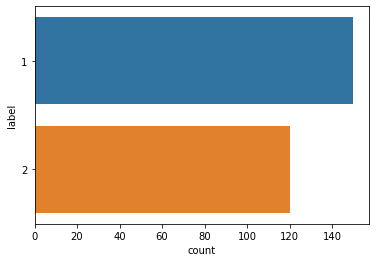

In [26]:
# Répartition graphique des labels
print(data.label.value_counts())
sns.countplot(y="label", data=data)

<AxesSubplot:xlabel='label', ylabel='Age'>

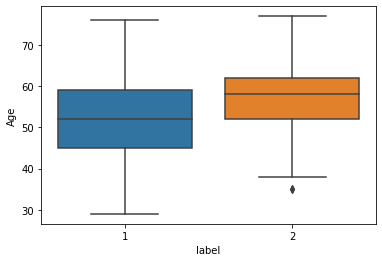

In [27]:
# Répartition graphique des exemples sur une variable spécifique qui AGE
sns.boxplot(x='label',y='Age',data=data)

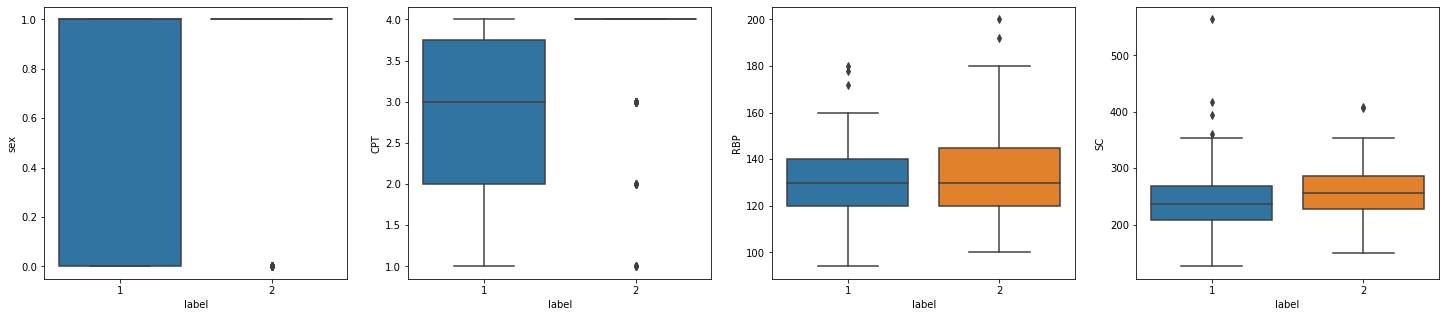

In [28]:
# Répartition graphique des exemples sur un tableau récapitulatif des 4 autres variables
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.boxplot(x='label',y='sex',data=data)
plt.subplot(1,4,2)
sns.boxplot(x='label',y='CPT',data=data)
plt.subplot(1,4,3)
sns.boxplot(x='label',y='RBP',data=data)
plt.subplot(1,4,4)
sns.boxplot(x='label',y='SC',data=data);

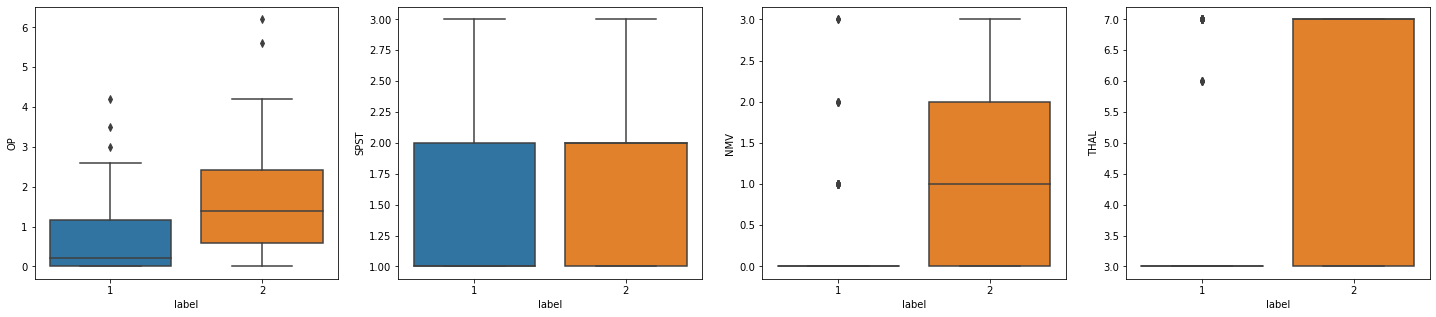

In [29]:
# Répartition graphique des exemples sur un tableau récapitulatif des 4 autres variables
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.boxplot(x='label',y='OP',data=data)
plt.subplot(1,4,2)
sns.boxplot(x='label',y='SPST',data=data)
plt.subplot(1,4,3)
sns.boxplot(x='label',y='NMV',data=data)
plt.subplot(1,4,4)
sns.boxplot(x='label',y='THAL',data=data);

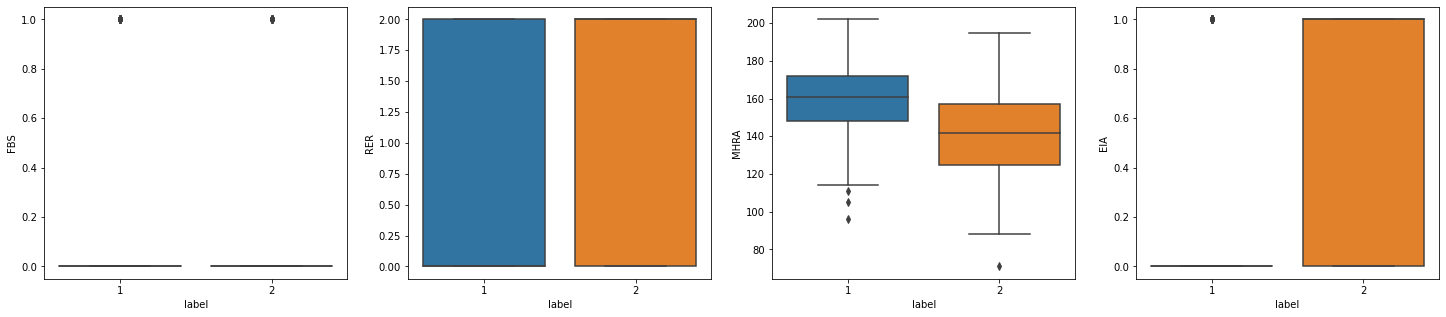

In [30]:
# Répartition graphique des exemples sur un tableau récapitulatif des 4 dernières variables
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
sns.boxplot(x='label',y='FBS',data=data)
plt.subplot(1,4,2)
sns.boxplot(x='label',y='RER',data=data)
plt.subplot(1,4,3)
sns.boxplot(x='label',y='MHRA',data=data)
plt.subplot(1,4,4)
sns.boxplot(x='label',y='EIA',data=data);

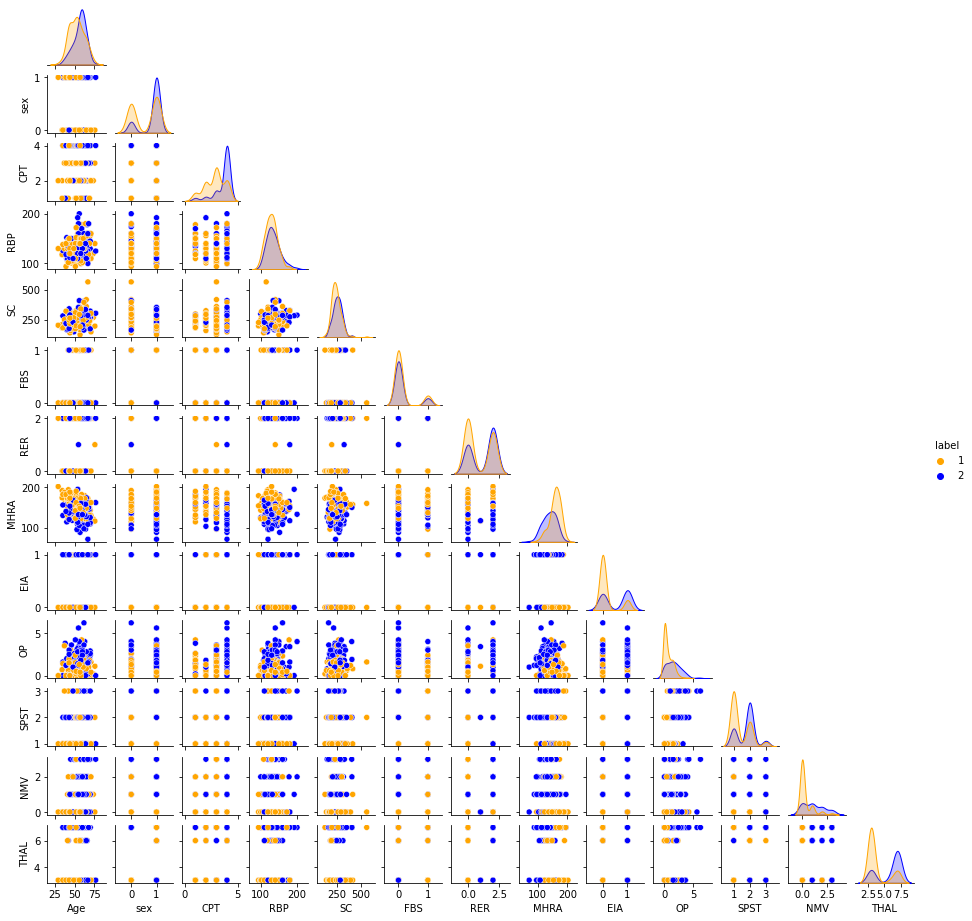

In [31]:
# Répartition graphique des exemples en fonction de toutes les combinaisons de variables 2 à 2
sns.pairplot(data, hue='label', corner = True, palette = ['orange', 'blue'], height=1)

<AxesSubplot:>

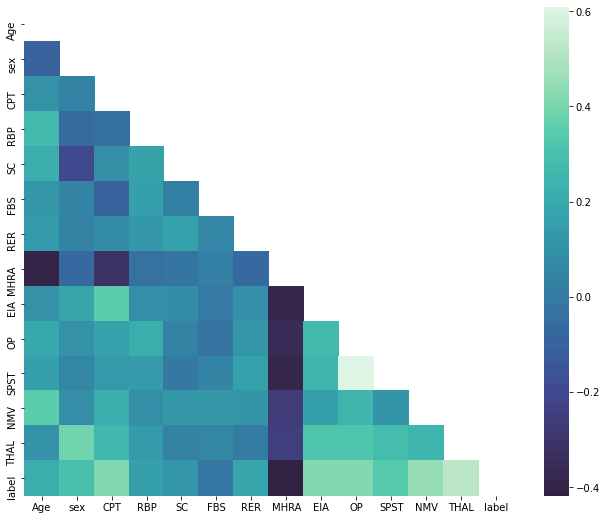

In [32]:
# Matrice de corrélations
data_corr = data.corr()

# masque triangulaire
mask = np.triu(np.ones_like(data_corr, dtype=bool))

# matplolib setup
f, ax = plt.subplots(figsize=(11, 9))

# matrice de corrélationa vec masque trinagulaire inférieur
sns.heatmap(data_corr, mask=mask, cmap = 'mako', center=0, square=True)

## Première stratégie

In [33]:
#RECUPÉRER LES INDEX PUIS EXTRAIRE X ET Y
X_index = data.columns[0:12]
Y_index = data.columns[13]
X = data[X_index]
Y = data[Y_index]

In [34]:
#S1.2 NORMALISATION des jeux de données
scaler= preprocessing.StandardScaler().fit(X[['Age', 'RBP','SC','MHRA','OP']])
X[['Age', 'RBP','SC','MHRA','OP']] = scaler.fit_transform(X[['Age', 'RBP','SC','MHRA','OP']])

C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\CBS Compter\anaconda3\envs\tensorflow7\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [35]:
X

,Age,sex,CPT,RBP,SC,FBS,RER,MHRA,EIA,OP,SPST,NMV
0,1.712094,1,4,-0.075410,1.402212,0,2,-1.759208,0,1.181012,2,3
1,1.382140,0,3,-0.916759,6.093004,0,2,0.446409,0,0.481153,2,0
2,0.282294,1,2,-0.411950,0.219823,0,0,-0.375291,0,-0.656118,1,0
3,1.052186,1,4,-0.187590,0.258589,0,0,-1.932198,1,-0.743600,2,1
4,2.152032,0,2,-0.636310,0.374890,0,2,-1.240239,1,-0.743600,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,1,3,2.280369,-0.981951,1,0,0.532904,0,-0.481153,1,0
266,-1.147506,1,2,-0.636310,0.258589,0,0,1.008625,0,-0.918565,1,0
267,0.172309,0,2,0.485490,0.859476,0,2,0.143677,0,0.218706,2,0
268,0.282294,1,4,0.485490,-1.117635,0,0,-0.072560,0,-0.568636,2,0


In [36]:
Y

0      2
1      1
2      2
3      1
4      1
      ..
265    1
266    1
267    1
268    1
269    2
Name: label, Length: 270, dtype: int64

In [37]:
# SÉPARATION EN DEUX JEUX DE DONNÉES:separez le jeu de donnees  (X, Y) en deux ensembles (X av, Y av) et (X t, Y t) avec un ratio
#de 1/2
X_av, X_t, Y_av, Y_t= train_test_split(X, Y, train_size=0.5,stratify=Y, random_state=0)

In [38]:
#S1.1 Separez l’ensemble  (X av, Y av) en un ensemble d’apprentissage (X a, Y a) et un ensemble de validation (X v,
#Y v) avec un ratio de 2/3
X_a, X_v, Y_a, Y_v = train_test_split(X_av, Y_av, train_size=2/3,stratify=Y_av, random_state=0)

In [39]:
#Appliquez l’algorithme des k plus proches voisins, pour chaque valeur de p k, de sorte a pouvoir evaluer l’erreur de 
#classification en apprentissage et en validation.
pk=[1, 5, 10, 15, 20 , 25]
errors_a = []
errors_v = []
errors_t = []

for k in pk:
    
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_a, Y_a)
    
    Y_a_pred= knn.predict(X_a)
    tn_a, fp_a, fn_a, tp_a = confusion_matrix(Y_a, Y_a_pred).ravel()
    error_a = (fp_a+(5*fn_a))/(fp_a+fn_a+tp_a+tn_a)
    errors_a.append(error_a)
    
    Y_v_pred=knn.predict(X_v)
    tn_v, fp_v, fn_v, tp_v = confusion_matrix(Y_v, Y_v_pred).ravel()
    error_v = (fp_v+5*fn_v)/(fp_v+fn_v+tp_v+tn_v)
    errors_v.append(error_v)
    
    Y_t_pred= knn.predict(X_t)
    
    tn_t, fp_t, fn_t, tp_t = confusion_matrix(Y_t, Y_t_pred).ravel()
    error_t= (fp_t+(5*fn_t))/(fp_t+fn_t+tp_t+tn_t)
    errors_t.append(error_t)

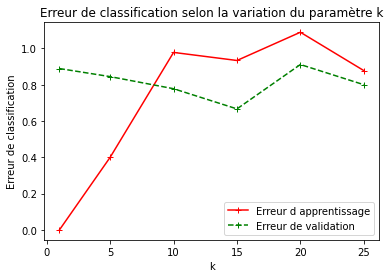

In [40]:
plt.plot(pk, errors_a, 'r+-', label='Erreur d apprentissage')
plt.plot(pk, errors_v, 'g+-',linestyle='--', label='Erreur de validation')
plt.ylabel('Erreur de classification')
plt.xlabel('k')
plt.legend()
plt.title("Erreur de classification selon la variation du paramètre k")
plt.show()

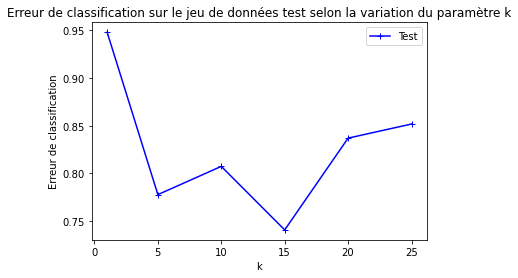

In [41]:
plt.plot(pk, errors_t, 'b+-', label='Test')
plt.ylabel('Erreur de classification')
plt.xlabel('k')
plt.title("Erreur de classification sur le jeu de données test selon la variation du paramètre k")
plt.legend()
plt.show()

In [42]:
print('L evaluation du meilleur modèle sur le jeu de données test pour k = 15 est '+ str(errors_t[0]))

L evaluation du meilleur modèle sur le jeu de données test pour k = 15 est 0.9481481481481482


## Deuxième stratégie 

In [43]:
Y_av=Y_av.reset_index(drop=True)

In [44]:
X_av=X_av.reset_index(drop=True)

In [45]:
# Utiliser Stritified k folds pour garantir l'équilibre entres les folds répartis 
mean_error_av= {}
errors_test =list()
for k in pk:
    scores_error = list()
    kfold = StratifiedKFold(n_splits=5, shuffle=True,random_state=0)
    # enumerate splits
    for train_ix, test_ix in kfold.split(X_av, Y_av):
        # get data
        train_X, test_X = X_av.iloc[train_ix], X_av.iloc[test_ix]
        train_y, test_y = Y_av.iloc[train_ix], Y_av.iloc[test_ix]
        # fit model
        model = KNeighborsClassifier(n_neighbors = k)
        model.fit(train_X, train_y)
        # evaluate model
        y_pred = model.predict(test_X)
        tn, fp, fn, tp = confusion_matrix(test_y, y_pred).ravel()
        error = (1- accuracy_score(test_y, y_pred))*((fp+5*fn)/(fp+fn))
        #(fp+(5*fn))/(fp+fn+tp+tn)
        # store score
        scores_error.append(error)

    #summarize model performance
    mean_error_av[k]=mean(scores_error)
    Y_t_pred=model.predict(X_t)
    tn_t, fp_t, fn_t, tp_t = confusion_matrix(Y_t, Y_t_pred).ravel()
    error_t = (fp_t+(5*fn_t))/(fp_t+fn_t+tp_t+tn_t)
    errors_test.append(error_t)

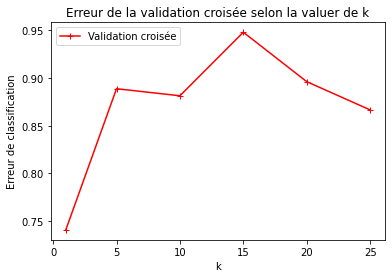

In [46]:
plt.plot(pk, mean_error_av.values(), 'r+-', label='Validation croisée')
plt.ylabel('Erreur de classification')
plt.xlabel('k')
plt.title("Erreur de la validation croisée selon la valuer de k")
plt.legend()
plt.show()

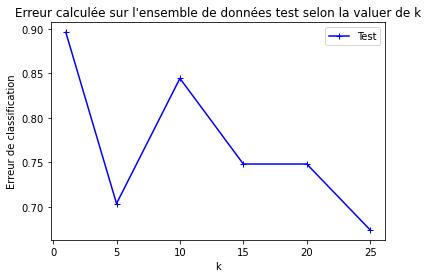

In [47]:
plt.plot(pk, errors_test, 'b+-', label='Test')
plt.ylabel('Erreur de classification')
plt.title("Erreur calculée sur l'ensemble de données test selon la valuer de k")
plt.xlabel('k')
plt.legend()
plt.show()

In [48]:
print('L evaluation du meilleur modèle sur le jeu de données test pour k = 1 est '+ str(errors_test[0]))

L evaluation du meilleur modèle sur le jeu de données test pour k = 1 est 0.8962962962962963
